<a href="https://colab.research.google.com/github/snvssk/data298A/blob/development/SolarEnergy/MLModels/SolarModel_ANN_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df= pd.read_csv('/content/drive/Shareddrives/DATA298/WeatherData/FinalWeatherData/all_cities_transformed_combined.csv')
df

,Unnamed: 0,Year,Month,Day,Hour,Minute,Temperature,Cloud_Type,Dew_Point,GHI,Relative_Humidity,Solar_Zenith_Angle,Surface_Albedo,Pressure,Precipitable_Water,Wind_Direction,Wind_Speed,Location
0,0,2018.0,1.0,1.0,0.0,0.0,11.2,4.0,10.2,0.0,93.63,165.41,0.100,1024.0,1.700,294.0,0.7,117987.0
1,1,2018.0,1.0,1.0,0.0,30.0,11.2,4.0,10.2,0.0,93.63,165.11,0.100,1024.0,1.700,307.0,0.7,117987.0
2,2,2018.0,1.0,1.0,1.0,0.0,11.1,4.0,10.1,0.0,93.38,162.29,0.100,1024.0,1.700,321.0,0.7,117987.0
3,3,2018.0,1.0,1.0,1.0,30.0,11.0,0.0,10.1,0.0,94.00,157.91,0.100,1024.0,1.800,332.0,0.7,117987.0
4,4,2018.0,1.0,1.0,2.0,0.0,10.9,0.0,9.9,0.0,93.32,152.72,0.100,1024.0,1.800,344.0,0.7,117987.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946181,946181,2013.0,12.0,31.0,21.0,30.0,6.0,1.0,0.0,0.0,74.05,142.58,0.113,1020.0,0.950,174.5,0.6,117546.0
946182,946182,2013.0,12.0,31.0,22.0,0.0,6.0,1.0,0.0,0.0,74.40,148.35,0.113,1020.0,0.977,152.1,0.9,117546.0
946183,946183,2013.0,12.0,31.0,22.0,30.0,5.0,0.0,0.0,0.0,79.80,153.89,0.113,1020.0,0.972,152.1,1.1,117546.0
946184,946184,2013.0,12.0,31.0,23.0,0.0,4.0,0.0,0.0,0.0,80.32,158.95,0.113,1020.0,0.968,166.7,1.3,117546.0


In [4]:
df.columns

Index(['Unnamed: 0', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Temperature',
       'Cloud_Type', 'Dew_Point', 'GHI', 'Relative_Humidity',
       'Solar_Zenith_Angle', 'Surface_Albedo', 'Pressure',
       'Precipitable_Water', 'Wind_Direction', 'Wind_Speed', 'Location'],
      dtype='object')

In [5]:
# nsrdb_na = df.drop(columns='Unnamed: 0')
nsrdb_na = df.copy()
#null_rows = nsrdb_na[nsrdb_na.isna().any(axis=1)]
#null_rows
nsrdb_na.isnull().sum()
#nsrdb_na.columns
#nsrdb_na['GHI'].isnull().values.sum()
nsrdb = nsrdb_na.dropna()
#print(nsrdb)
nsrdb.isnull().sum()

Unnamed: 0            0
Year                  0
Month                 0
Day                   0
Hour                  0
Minute                0
Temperature           0
Cloud_Type            0
Dew_Point             0
GHI                   0
Relative_Humidity     0
Solar_Zenith_Angle    0
Surface_Albedo        0
Pressure              0
Precipitable_Water    0
Wind_Direction        0
Wind_Speed            0
Location              0
dtype: int64

In [ ]:
"""from datetime import datetime
nsrdb['Date'] = nsrdb.apply(lambda row: datetime.strptime(f"{int(row.Year)}-{int(row.Month)}-{int(row.Day)}", '%Y-%m-%d'), axis=1)
nsrdb['Date'] = pd.to_datetime(nsrdb['Date'])
nsrdb.info()
nsrdb = nsrdb.resample('D', on='Date').mean()
#nsrdb.drop(['Hour'],	['Minute'], axis=1)
nsrdb"""

In [6]:
nsrdb = nsrdb.loc[(nsrdb['Hour'].isin([7, 10, 13, 16, 19])) & (nsrdb['Minute'] == 0)]
nsrdb= nsrdb.drop(['Unnamed: 0'], axis=1)
nsrdb

,Year,Month,Day,Hour,Minute,Temperature,Cloud_Type,Dew_Point,GHI,Relative_Humidity,Solar_Zenith_Angle,Surface_Albedo,Pressure,Precipitable_Water,Wind_Direction,Wind_Speed,Location
14,2018.0,1.0,1.0,7.0,0.0,9.8,7.0,8.8,0.0,93.25,94.85,0.100,1025.0,1.800,325.0,0.7,117987.0
20,2018.0,1.0,1.0,10.0,0.0,14.0,7.0,9.5,290.0,74.48,67.81,0.100,1026.0,1.800,24.0,1.5,117987.0
26,2018.0,1.0,1.0,13.0,0.0,17.6,7.0,8.6,421.0,55.38,61.32,0.100,1024.0,1.800,15.0,0.9,117987.0
32,2018.0,1.0,1.0,16.0,0.0,15.4,7.0,9.2,114.0,66.62,80.55,0.100,1023.0,1.800,14.0,0.8,117987.0
38,2018.0,1.0,1.0,19.0,0.0,12.8,7.0,8.3,0.0,74.04,112.83,0.100,1024.0,1.700,72.0,1.0,117987.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946152,2013.0,12.0,31.0,7.0,0.0,9.0,7.0,8.0,0.0,100.00,94.75,0.111,1020.0,1.233,174.6,0.4,117546.0
946158,2013.0,12.0,31.0,10.0,0.0,13.0,3.0,7.0,281.0,74.38,67.81,0.111,1020.0,1.403,23.4,0.7,117546.0
946164,2013.0,12.0,31.0,13.0,0.0,17.0,7.0,4.0,411.0,49.14,61.44,0.111,1020.0,1.334,33.3,1.1,117546.0
946170,2013.0,12.0,31.0,16.0,0.0,7.0,4.0,1.0,84.0,73.84,80.77,0.113,1020.0,0.999,343.0,0.8,117546.0


In [7]:
target = nsrdb['GHI']#keeping only target(ghi) data here
input= nsrdb.drop(['GHI'], axis=1)
input

,Year,Month,Day,Hour,Minute,Temperature,Cloud_Type,Dew_Point,Relative_Humidity,Solar_Zenith_Angle,Surface_Albedo,Pressure,Precipitable_Water,Wind_Direction,Wind_Speed,Location
14,2018.0,1.0,1.0,7.0,0.0,9.8,7.0,8.8,93.25,94.85,0.100,1025.0,1.800,325.0,0.7,117987.0
20,2018.0,1.0,1.0,10.0,0.0,14.0,7.0,9.5,74.48,67.81,0.100,1026.0,1.800,24.0,1.5,117987.0
26,2018.0,1.0,1.0,13.0,0.0,17.6,7.0,8.6,55.38,61.32,0.100,1024.0,1.800,15.0,0.9,117987.0
32,2018.0,1.0,1.0,16.0,0.0,15.4,7.0,9.2,66.62,80.55,0.100,1023.0,1.800,14.0,0.8,117987.0
38,2018.0,1.0,1.0,19.0,0.0,12.8,7.0,8.3,74.04,112.83,0.100,1024.0,1.700,72.0,1.0,117987.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946152,2013.0,12.0,31.0,7.0,0.0,9.0,7.0,8.0,100.00,94.75,0.111,1020.0,1.233,174.6,0.4,117546.0
946158,2013.0,12.0,31.0,10.0,0.0,13.0,3.0,7.0,74.38,67.81,0.111,1020.0,1.403,23.4,0.7,117546.0
946164,2013.0,12.0,31.0,13.0,0.0,17.0,7.0,4.0,49.14,61.44,0.111,1020.0,1.334,33.3,1.1,117546.0
946170,2013.0,12.0,31.0,16.0,0.0,7.0,4.0,1.0,73.84,80.77,0.113,1020.0,0.999,343.0,0.8,117546.0


In [8]:
from sklearn.preprocessing import StandardScaler
#Normalize the dataset
sc = StandardScaler()
input_normalized = sc.fit_transform(input)

In [9]:
from sklearn.model_selection import train_test_split
import numpy as np
x_train, x_test, y_train, y_test = train_test_split(input_normalized, target, test_size=0.3, random_state=42)

In [10]:
x_train

array([[ 1.54919334, -0.73263815, -1.67350325, ...,  0.19342801,
        -0.07558806,  0.18471012],
       [-0.38729833,  1.0075761 ,  1.16861794, ...,  0.93113411,
        -1.10698678, -0.92943222],
       [ 1.161895  , -1.60274527, -0.99139416, ..., -1.55319967,
        -0.9596441 , -0.18583043],
       ...,
       [ 0.        , -1.31270956, -1.33244871, ...,  0.25851973,
        -1.32800079, -0.92859199],
       [ 1.54919334, -0.15256673,  0.71387855, ..., -0.10792252,
        -0.59128742,  0.18471012],
       [ 0.77459667,  0.42750469,  1.39598764, ...,  0.11266607,
        -0.73863009,  0.18471012]])

In [11]:
print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_text shape",y_test.shape)

x_train shape (68985, 16)
x_test shape (29565, 16)
y_train shape (68985,)
y_text shape (29565,)


# https://github.com/tpt5cu/solarIrradiancePredictor/blob/master/Neural_Net.ipynb

In [12]:
from tensorflow.keras.optimizers import Adam
import pandas as pd
import os
import numpy as np
from glob import glob
from matplotlib import pyplot as plt
import seaborn as sns
from random import randint
from glob import glob
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
"""keras.backend.clear_session()
tf.keras.backend.clear_session()
tf.compat.v1.reset_default_graph"""

In [13]:
model = keras.Sequential()
model.add(layers.InputLayer(input_shape=x_train.shape[1:]))
model.add(tf.keras.layers.Normalization(axis=None, mean=None, variance=None))
model.add(layers.Dense(300, activation="relu"))
model.add(layers.Dense(200, activation="relu"))
model.add(layers.Dense(100, activation="relu"))
model.add(layers.Dense(50, activation="relu"))
model.add(layers.Dense(25, activation="relu"))
model.add(layers.Dense(1, activation='relu'))

In [14]:
#Compile and train
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='mse',
              metrics=['mae',keras.metrics.RootMeanSquaredError()])

In [15]:
history = model.fit(x_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
1078/1078 [==============================] - 7s 6ms/step - loss: 12939.0889 - mae: 56.1640 - root_mean_squared_error: 113.7501
Epoch 2/100
1078/1078 [==============================] - 9s 8ms/step - loss: 3111.7263 - mae: 30.5595 - root_mean_squared_error: 55.7828
Epoch 3/100
1078/1078 [==============================] - 9s 8ms/step - loss: 2748.7175 - mae: 27.6960 - root_mean_squared_error: 52.4282
Epoch 4/100
1078/1078 [==============================] - 6s 6ms/step - loss: 2598.2566 - mae: 26.2316 - root_mean_squared_error: 50.9731
Epoch 5/100
1078/1078 [==============================] - 6s 5ms/step - loss: 2541.8894 - mae: 25.8537 - root_mean_squared_error: 50.4172
Epoch 6/100
1078/1078 [==============================] - 6s 6ms/step - loss: 2457.2673 - mae: 25.1287 - root_mean_squared_error: 49.5708
Epoch 7/100
1078/1078 [==============================] - 6s 5ms/step - loss: 2417.4414 - mae: 24.7632 - root_mean_squared_error: 49.1675
Epoch 8/100
1078/1078 [================

In [28]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Delete saved model before saving another time

In [ ]:
rm -rf '/content/drive/MyDrive/my_model'

In [29]:
model.save('/content/drive/MyDrive/ANN_Final')

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 16)               3         
 n)                                                              
                                                                 
 dense (Dense)               (None, 300)               5100      
                                                                 
 dense_1 (Dense)             (None, 200)               60200     
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 50)                5050      
                                                                 
 dense_4 (Dense)             (None, 25)                1275      
                                                        

## Training MAE 10.50 w/m2, RMSE 26.05 w/m2 after 100 epoch

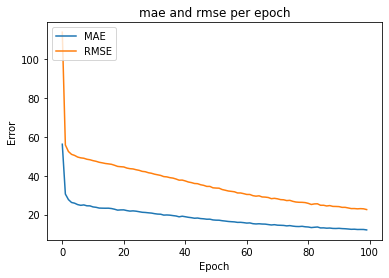

In [16]:
plt.plot(history.history['mae'])
plt.plot(history.history['root_mean_squared_error'])
plt.title('mae and rmse per epoch')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['MAE', 'RMSE'], loc='upper left')
plt.show()

In [17]:
y_pred=model.predict(x_test)
y_pred

924/924 [==============================] - 3s 3ms/step


array([[  0.     ],
       [695.5971 ],
       [  0.     ],
       ...,
       [425.51846],
       [245.36008],
       [  0.     ]], dtype=float32)

In [18]:
from sklearn.metrics import r2_score 
from sklearn import metrics
R_square = r2_score(y_test, y_pred) 
print('Coefficient of Determination R2', R_square)
print("Model MAE", metrics.mean_absolute_error(y_test, y_pred))
print("Model MSE", metrics.mean_squared_error(y_test, y_pred))
print("Model RMSE",np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

Coefficient of Determination R2 0.9790300954938829
Model MAE 19.866353934137386
Model MSE 2182.709080574591
Model RMSE 46.71947217782529


### The model validated with 30% data and the validation MAE we got 11.68 w/m2, and RMSE 33.17 w/m2. Might be the validation dataset location is different than the training dataset. So, we got bit high MAE and RMSE. We will validate the model with a new location and observe the errors. However, it still performed surprisingly well. 

# Test with new location

## Cupertino

In [19]:
import pandas as pd
df =pd.read_csv('/content/drive/Shareddrives/DATA298/WeatherData/Test_WeatherData/cupertino_test.csv')
df

,Unnamed: 0,Year,Month,Day,Hour,Minute,Temperature,Cloud_Type,Dew_Point,GHI,Relative_Humidity,Solar_Zenith_Angle,Surface_Albedo,Pressure,Precipitable_Water,Wind_Direction,Wind_Speed,Location
0,0,2020.0,1.0,1.0,0.0,0.0,9.0,7.0,9.0,0.0,100.00,165.51,0.13,1023.0,1.1,282.0,1.4,117546.0
1,1,2020.0,1.0,1.0,0.0,30.0,9.3,7.0,9.3,0.0,100.00,165.16,0.13,1023.0,1.1,278.0,1.3,117546.0
2,2,2020.0,1.0,1.0,1.0,0.0,9.6,7.0,9.6,0.0,100.00,162.29,0.13,1023.0,1.2,274.0,1.1,117546.0
3,3,2020.0,1.0,1.0,1.0,30.0,9.6,7.0,9.6,0.0,100.00,157.87,0.13,1023.0,1.2,265.0,1.1,117546.0
4,4,2020.0,1.0,1.0,2.0,0.0,9.6,8.0,9.6,0.0,100.00,152.66,0.13,1023.0,1.2,256.0,1.0,117546.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35037,35037,2019.0,12.0,31.0,21.0,30.0,4.7,7.0,0.4,0.0,73.43,142.66,0.13,1021.0,0.3,23.0,2.4,117546.0
35038,35038,2019.0,12.0,31.0,22.0,0.0,4.4,0.0,-0.1,0.0,72.34,148.44,0.13,1021.0,0.3,25.0,2.3,117546.0
35039,35039,2019.0,12.0,31.0,22.0,30.0,4.0,0.0,-0.1,0.0,74.40,153.97,0.13,1021.0,0.3,27.0,2.2,117546.0
35040,35040,2019.0,12.0,31.0,23.0,0.0,3.7,0.0,-0.7,0.0,72.72,159.03,0.13,1021.0,0.3,29.0,2.1,117546.0


In [20]:

df = df.loc[(df['Hour'].isin([7, 10, 13, 16, 19])) & (df['Minute'] == 0)]
df = df.drop(['Unnamed: 0'],axis =1)
null = df[df.isna().any(axis=1)]
cupertino_final = df.dropna()
df.isnull().sum()

target_test = df['GHI']#keeping only target(ghi) data here
input_test= df.drop(['GHI'], axis=1)
input_test.head()

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
input_nor_test = sc.fit_transform(input_test)
y_pred_test=model.predict(input_nor_test)
y_pred_test

from sklearn import metrics
print("Model MAE", metrics.mean_absolute_error(target_test, y_pred_test))
print("Model MSE", metrics.mean_squared_error(target_test, y_pred_test))
print("Model RMSE",np.sqrt(metrics.mean_squared_error(target_test, y_pred_test)))

115/115 [==============================] - 0s 3ms/step
Model MAE 27.58415994569047
Model MSE 3351.782320879758
Model RMSE 57.89457937389094


## FosterCity

In [21]:
df =pd.read_csv('/content/drive/Shareddrives/DATA298/WeatherData/Test_WeatherData/fostercity_test.csv')
df

,Unnamed: 0,Year,Month,Day,Hour,Minute,Temperature,Cloud_Type,Dew_Point,GHI,Relative_Humidity,Solar_Zenith_Angle,Surface_Albedo,Pressure,Precipitable_Water,Wind_Direction,Wind_Speed,Location
0,0,2019.0,1.0,1.0,0.0,0.0,5.3,0.0,1.1,0.0,74.37,165.21,0.09,1028.0,0.3,29.0,5.0,120198.0
1,1,2019.0,1.0,1.0,0.0,30.0,5.1,0.0,1.1,0.0,75.41,164.97,0.09,1028.0,0.3,30.0,5.0,120198.0
2,2,2019.0,1.0,1.0,1.0,0.0,5.0,0.0,0.8,0.0,74.07,162.23,0.09,1029.0,0.3,30.0,4.9,120198.0
3,3,2019.0,1.0,1.0,1.0,30.0,5.0,0.0,0.8,0.0,74.07,157.91,0.09,1029.0,0.3,31.0,4.9,120198.0
4,4,2019.0,1.0,1.0,2.0,0.0,4.9,0.0,0.2,0.0,71.60,152.76,0.09,1029.0,0.3,31.0,4.9,120198.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35037,35037,2020.0,12.0,31.0,21.0,30.0,11.1,7.0,9.7,0.0,91.09,142.44,0.09,1030.0,1.1,297.0,2.5,120198.0
35038,35038,2020.0,12.0,31.0,22.0,0.0,10.6,7.0,10.1,0.0,97.02,148.20,0.09,1030.0,1.2,300.0,2.9,120198.0
35039,35039,2020.0,12.0,31.0,22.0,30.0,10.4,7.0,10.1,0.0,98.32,153.71,0.09,1030.0,1.2,303.0,3.1,120198.0
35040,35040,2020.0,12.0,31.0,23.0,0.0,10.2,7.0,10.2,0.0,100.00,158.76,0.09,1030.0,1.2,307.0,3.3,120198.0


In [22]:
df = df.loc[(df['Hour'].isin([7, 10, 13, 16, 19])) & (df['Minute'] == 0)]
df = df.drop(['Unnamed: 0'],axis =1)
null = df[df.isna().any(axis=1)]
cupertino_final = df.dropna()
df.isnull().sum()

target_test = df['GHI']#keeping only target(ghi) data here
input_test= df.drop(['GHI'], axis=1)
input_test.head()

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
input_nor_test = sc.fit_transform(input_test)
y_pred_test=model.predict(input_nor_test)
y_pred_test

from sklearn import metrics
print("Model MAE", metrics.mean_absolute_error(target_test, y_pred_test))
print("Model MSE", metrics.mean_squared_error(target_test, y_pred_test))
print("Model RMSE",np.sqrt(metrics.mean_squared_error(target_test, y_pred_test)))

115/115 [==============================] - 0s 2ms/step
Model MAE 29.19396081330025
Model MSE 3869.01764842444
Model RMSE 62.201428025604365


### LosGatos

In [23]:
df =pd.read_csv('/content/drive/Shareddrives/DATA298/WeatherData/Test_WeatherData/losgatos_test.csv')
df

,Unnamed: 0,Year,Month,Day,Hour,Minute,Temperature,Cloud_Type,Dew_Point,GHI,Relative_Humidity,Solar_Zenith_Angle,Surface_Albedo,Pressure,Precipitable_Water,Wind_Direction,Wind_Speed,Location
0,0,2019.0,1.0,1.0,0.0,0.0,3.3,0.0,-0.9,0.0,73.88,165.55,0.12,1016.0,0.3,29.0,1.9,116662.0
1,1,2019.0,1.0,1.0,0.0,30.0,3.1,0.0,-0.9,0.0,74.93,165.20,0.12,1016.0,0.3,26.0,1.9,116662.0
2,2,2019.0,1.0,1.0,1.0,0.0,2.9,0.0,-1.3,0.0,73.65,162.32,0.12,1016.0,0.3,24.0,1.9,116662.0
3,3,2019.0,1.0,1.0,1.0,30.0,2.9,0.0,-1.3,0.0,73.72,157.90,0.12,1017.0,0.3,19.0,1.9,116662.0
4,4,2019.0,1.0,1.0,2.0,0.0,2.8,0.0,-1.8,0.0,71.84,152.68,0.12,1017.0,0.3,15.0,2.0,116662.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35037,35037,2020.0,12.0,31.0,21.0,30.0,10.7,7.0,7.5,0.0,80.58,142.72,0.12,1018.0,1.0,235.0,1.1,116662.0
35038,35038,2020.0,12.0,31.0,22.0,0.0,10.2,7.0,7.9,0.0,85.47,148.50,0.12,1018.0,1.0,251.0,1.4,116662.0
35039,35039,2020.0,12.0,31.0,22.0,30.0,9.6,7.0,7.9,0.0,88.96,154.05,0.12,1018.0,1.0,260.0,1.5,116662.0
35040,35040,2020.0,12.0,31.0,23.0,0.0,9.1,7.0,8.6,0.0,96.76,159.12,0.12,1018.0,1.1,269.0,1.6,116662.0


In [24]:
df = df.loc[(df['Hour'].isin([7, 10, 13, 16, 19])) & (df['Minute'] == 0)]
df = df.drop(['Unnamed: 0'],axis =1)
null = df[df.isna().any(axis=1)]
cupertino_final = df.dropna()
df.isnull().sum()

target_test = df['GHI']#keeping only target(ghi) data here
input_test= df.drop(['GHI'], axis=1)
input_test.head()

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
input_nor_test = sc.fit_transform(input_test)
y_pred_test=model.predict(input_nor_test)
y_pred_test

from sklearn import metrics
print("Model MAE", metrics.mean_absolute_error(target_test, y_pred_test))
print("Model MSE", metrics.mean_squared_error(target_test, y_pred_test))
print("Model RMSE",np.sqrt(metrics.mean_squared_error(target_test, y_pred_test)))

115/115 [==============================] - 0s 2ms/step
Model MAE 27.04713988242084
Model MSE 3158.523866864233
Model RMSE 56.20074614152585


### Saratoga

In [25]:
df =pd.read_csv('/content/drive/Shareddrives/DATA298/WeatherData/Test_WeatherData/saratoga_2020.csv')
df

,Year,Month,Day,Hour,Minute,Temperature,Cloud Type,Dew Point,GHI,Relative Humidity,Solar Zenith Angle,Surface Albedo,Pressure,Precipitable Water,Wind Direction,Wind Speed,Location
0,2020,1,1,0,0,8.3,7,8.3,0,100.00,165.59,0.11,1006,1.0,319,1.7,116661
1,2020,1,1,0,30,8.5,7,8.5,0,100.00,165.23,0.11,1006,1.1,327,1.6,116661
2,2020,1,1,1,0,8.7,7,8.7,0,100.00,162.35,0.11,1006,1.1,336,1.6,116661
3,2020,1,1,1,30,8.8,7,8.8,0,100.00,157.92,0.11,1006,1.1,336,1.5,116661
4,2020,1,1,2,0,8.9,7,8.9,0,100.00,152.69,0.11,1006,1.1,337,1.4,116661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17515,2020,12,31,21,30,10.2,7,7.5,0,83.23,142.70,0.11,1006,0.9,323,1.1,116661
17516,2020,12,31,22,0,9.7,7,7.8,0,88.11,148.49,0.11,1006,1.0,294,1.4,116661
17517,2020,12,31,22,30,9.1,7,7.8,0,91.73,154.04,0.11,1006,1.0,298,1.6,116661
17518,2020,12,31,23,0,8.6,7,8.5,0,99.42,159.12,0.11,1006,1.0,302,1.7,116661


In [27]:
df = df.loc[(df['Hour'].isin([7, 10, 13, 16, 19])) & (df['Minute'] == 0)]
#df = df.drop(['Unnamed: 0'],axis =1)
null = df[df.isna().any(axis=1)]
cupertino_final = df.dropna()
df.isnull().sum()

target_test = df['GHI']#keeping only target(ghi) data here
input_test= df.drop(['GHI'], axis=1)
input_test.head()

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
input_nor_test = sc.fit_transform(input_test)
y_pred_test=model.predict(input_nor_test)
y_pred_test

from sklearn import metrics
print("Model MAE", metrics.mean_absolute_error(target_test, y_pred_test))
print("Model MSE", metrics.mean_squared_error(target_test, y_pred_test))
print("Model RMSE",np.sqrt(metrics.mean_squared_error(target_test, y_pred_test)))

58/58 [==============================] - 0s 2ms/step
Model MAE 28.052558402361935
Model MSE 3582.6169744593362
Model RMSE 59.854966163713904


In [49]:
#@title Default title text
input_nor_test[602]

array([ 0.        , -0.44260244, -1.67350325,  0.        ,  0.        ,
        0.67393401, -0.48806743, -0.40849872, -1.01574872, -1.65861475,
        0.87507682,  0.2195846 ,  0.34017835,  0.6031602 ,  0.77313088,
        0.        ])